In [4]:
1 + 1

2

In [5]:
import mozo2 

import importlib
importlib.reload(mozo2)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mozo import compare_and_combine_2, Diff, merge_with_features, num_to_range_categories
import pandas as pd
import numpy as np
np.random.seed(0)

import xgboost as xgb

from scipy import stats
import math 
import datetime 

from sklearn.metrics import r2_score, mean_absolute_error
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from functools import partial
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
from sklearn.svm import SVC

from sklearn.metrics import r2_score, f1_score, mean_absolute_error, mean_squared_error

from scikitplot.estimators import plot_learning_curve

import time
from datetime import datetime


In [6]:
total = pd.read_csv('~/pml7/konkurs/output/newest_total_20201101_07_20.h5.csv')
total.info(verbose=True)

/home/conda/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,86,161) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160616 entries, 0 to 160615
Data columns (total 218 columns):
 #   Column                                                  Dtype  
---  ------                                                  -----  
 0   breadcrumb                                              object 
 1   created_at                                              object 
 2   price_currency                                          object 
 3   price_details                                           object 
 4   price_value                                             float64
 5   seller_address                                          object 
 6   seller_name                                             object 
 7   seller_type                                             object 
 8   feature_czujniki_parkowania_przednie                    bool   
 9   feature_poduszka_powietrzna_chroniąca_kolana            bool   
 10  feature_kurtyny_powietrzne                             

1: price_currency [100.00%=160616/160616 #2]: 
PLN    160288
EUR       328
Name: price_currency, dtype: int64


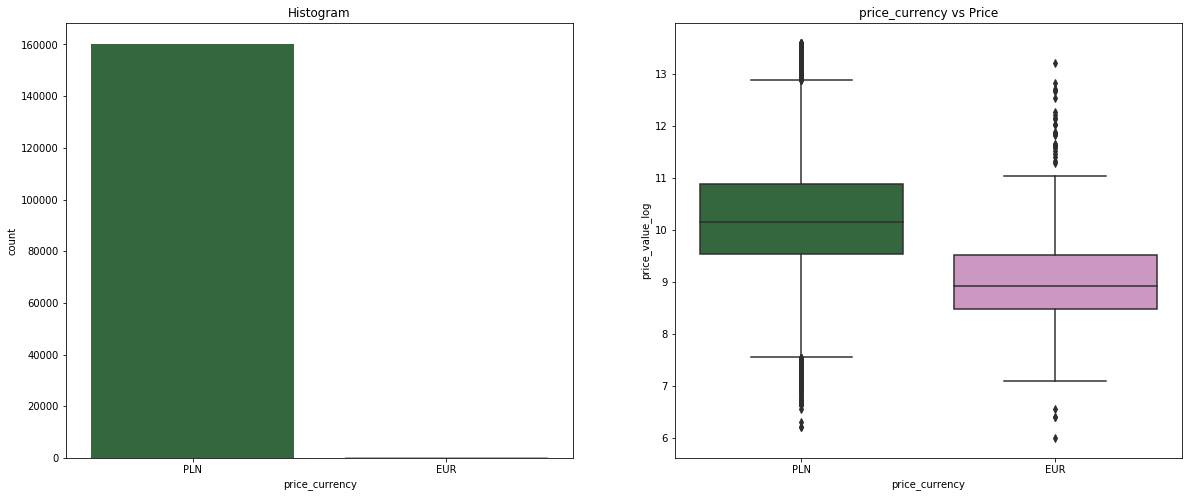

2: price_details [66.30%=106494/160616 #16]: 
Cena Brutto, Do negocjacji                                                    49422
Cena Brutto                                                                   29148
Cena Brutto, Faktura VAT                                                      13781
Cena Brutto, Do negocjacji, Faktura VAT                                        7528
Cena Netto, Faktura VAT                                                        2828
Cena Netto, Do negocjacji, Faktura VAT                                         2277
Cena Netto                                                                      716
Cena Netto, Do negocjacji                                                       685
Brutto                                        , Do negocjacji                    51
Brutto                                                                           27
Brutto                    , Faktura VAT                    , Do negocjacji       10
Brutto                    , Fa

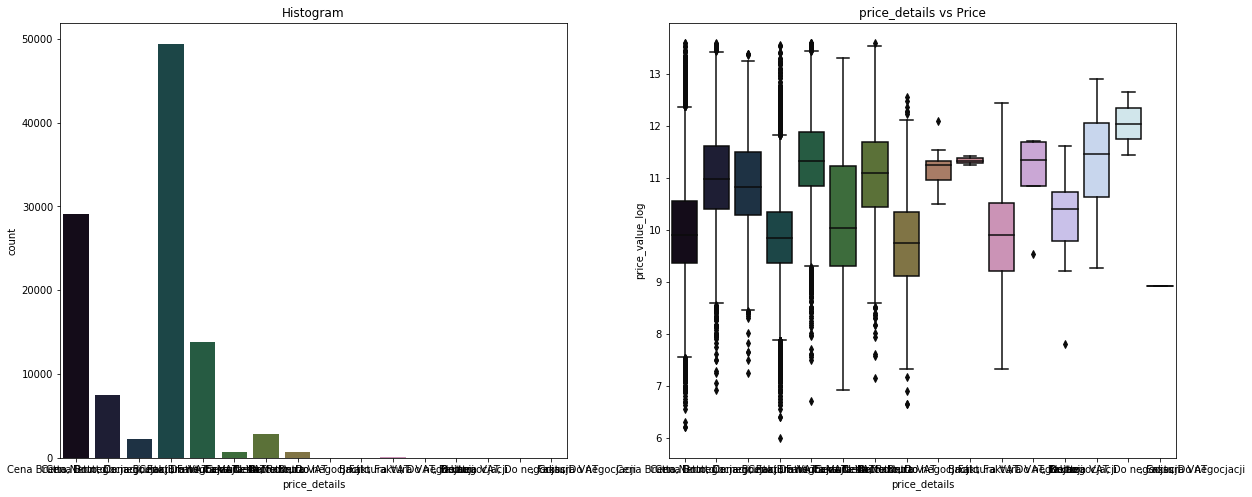

4: seller_address [99.90%=160455/160616 #12808]: 
5: seller_name [60.53%=97228/160616 #7005]: 
6: seller_type [99.90%=160455/160616 #2]: 
Dealer            97228
Osoba prywatna    63227
Name: seller_type, dtype: int64


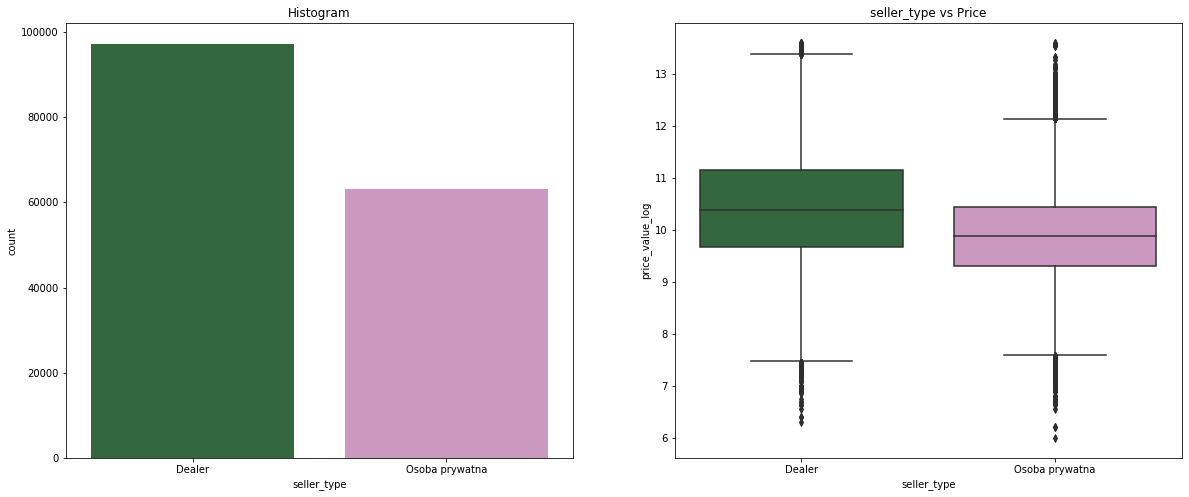

78: param_vin [22.23%=35701/160616 #35257]: 
81: param_kategoria [99.90%=160455/160616 #1]: 
83: param_wartość_wykupu [0.25%=407/160616 #353]: 
85: param_liczba_pozostałych_rat [0.28%=442/160616 #85]: 
86: param_oferta_od [99.90%=160455/160616 #2]: 
Firmy              97223
Osoby prywatnej    63232
Name: param_oferta_od, dtype: int64


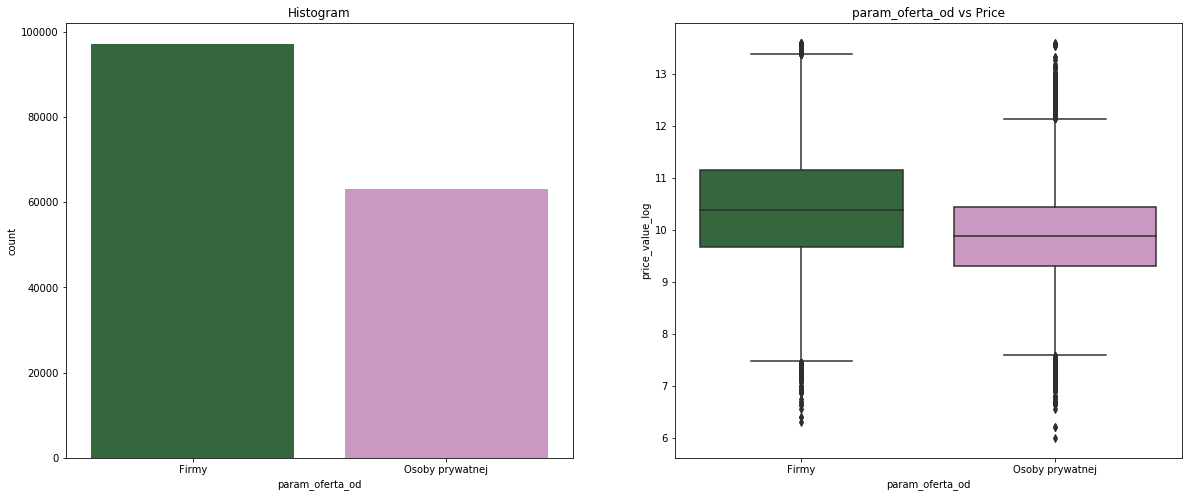

87: param_opłata_początkowa [0.26%=412/160616 #258]: 
91: param_stan [99.90%=160455/160616 #2]: 
Używane    146217
Nowe        14238
Name: param_stan, dtype: int64


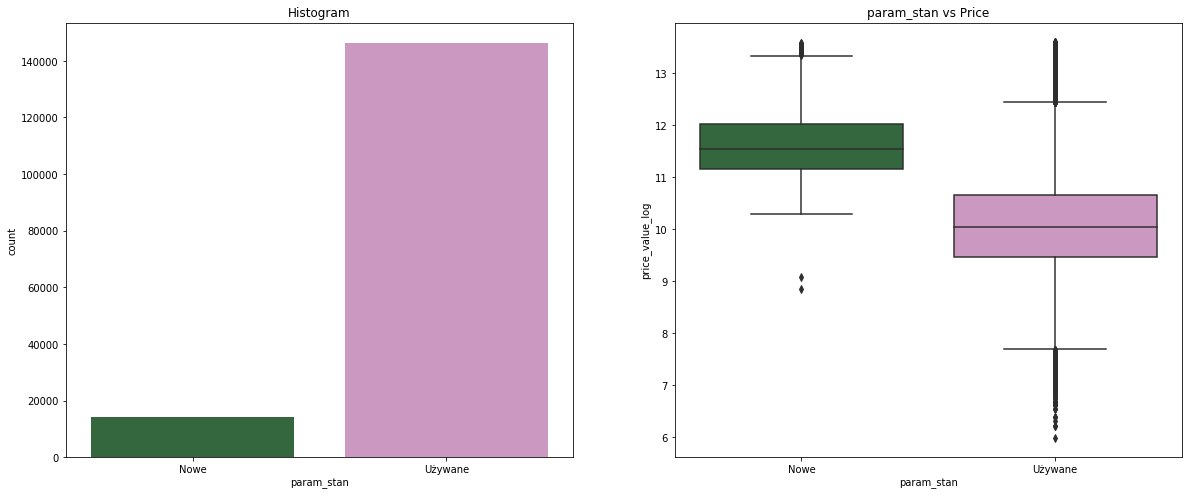

104: param_marka_pojazdu [99.90%=160455/160616 #103]: 
105: param_model_pojazdu [99.90%=160455/160616 #1049]: 
106: param_kod_silnika [10.75%=17265/160616 #237]: 
108: param_pierwsza_rejestracja [36.28%=58276/160616 #8160]: 
109: param_kraj_pochodzenia [68.01%=109232/160616 #35]: 
110: param_skrzynia_biegów [94.56%=151871/160616 #5]: 
Manualna                                 110681
Automatyczna hydrauliczna (klasyczna)     27955
Automatyczna dwusprzęgłowa (DCT, DSG)      9629
Automatyczna bezstopniowa (CVT)            2302
Półautomatyczna (ASG, Tiptronic)           1304
Name: param_skrzynia_biegów, dtype: int64


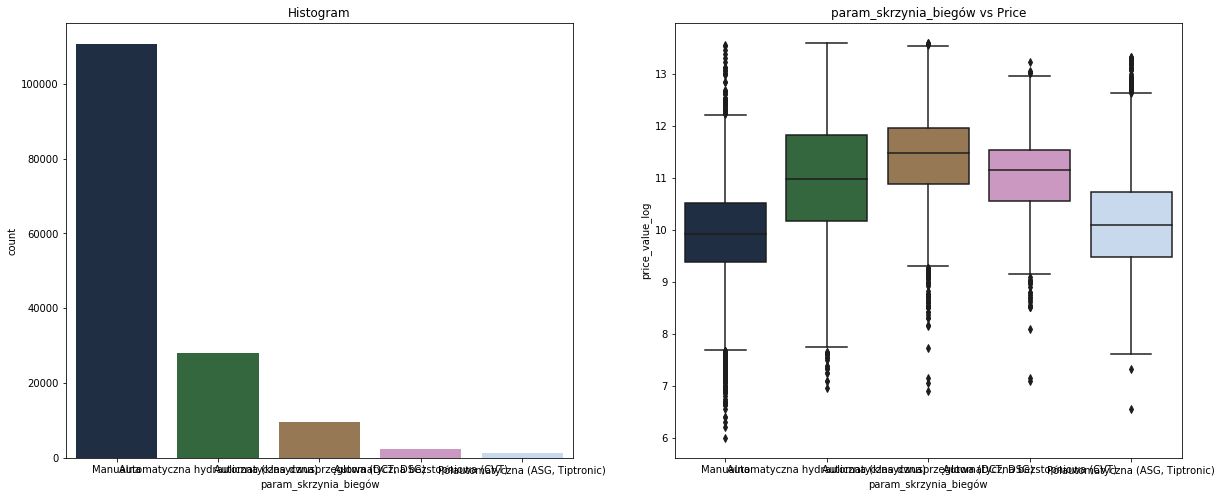

112: param_kolor [99.90%=160455/160616 #14]: 
Czarny        39267
Srebrny       29515
Szary         21927
Biały         17687
Niebieski     17423
Inny kolor    11467
Czerwony       6246
Brązowy        4284
Zielony        3872
Bordowy        2850
Złoty          2448
Beżowy         2113
Fioletowy       736
Żółty           620
Name: param_kolor, dtype: int64


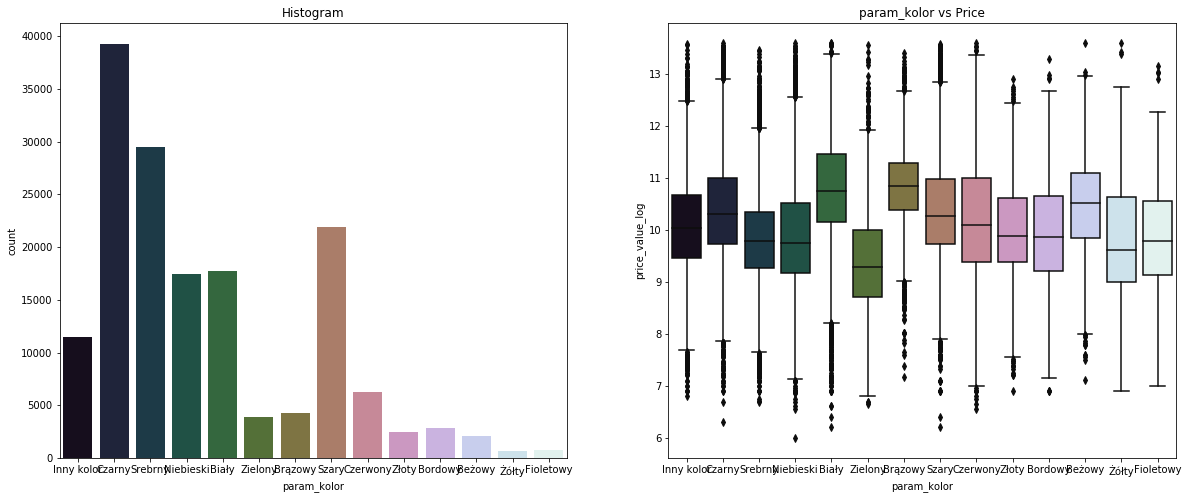

118: param_napęd [84.68%=136003/160616 #5]: 
Na przednie koła                 99630
Na tylne koła                    12967
4x4 (stały)                      10641
4x4 (dołączany automatycznie)    10341
4x4 (dołączany ręcznie)           2424
Name: param_napęd, dtype: int64


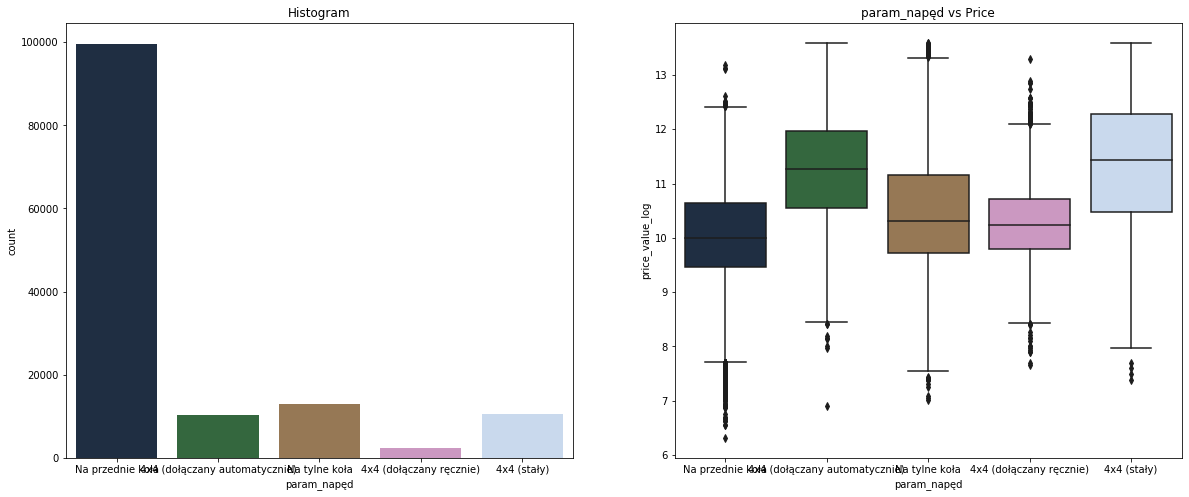

120: param_rodzaj_paliwa [99.90%=160455/160616 #8]: 
Diesel         81448
Benzyna        70631
Benzyna+LPG     7187
Hybryda          960
Elektryczny      125
Benzyna+CNG      102
Wodór              1
Etanol             1
Name: param_rodzaj_paliwa, dtype: int64


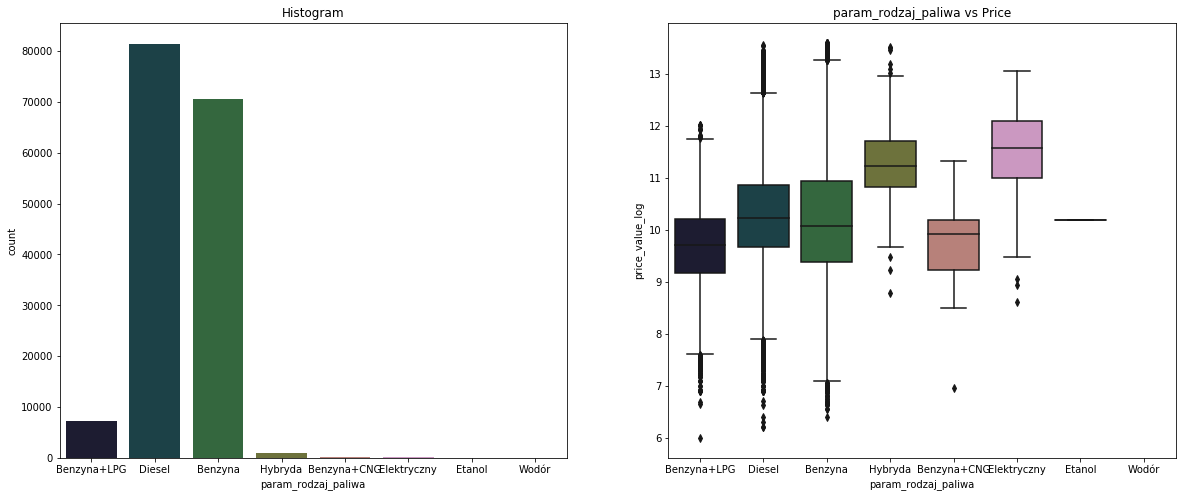

121: param_typ [99.90%=160454/160616 #20]: 
Kombi                   33012
Sedan                   27051
Kompakt                 24864
SUV                     24263
Auta miejskie           20532
Minivan                 19784
Auta małe                5407
Coupe                    4011
Kabriolet                1348
sedan/coupe/cabrio         45
hatchback                  43
sedan/coupe                40
coupe/cabrio               37
minivan/city-car            6
city-car/suv                3
compact/minivan             3
coupe/cabrio/minivan        2
not enough details          1
compact/sedan               1
others                      1
Name: param_typ, dtype: int64


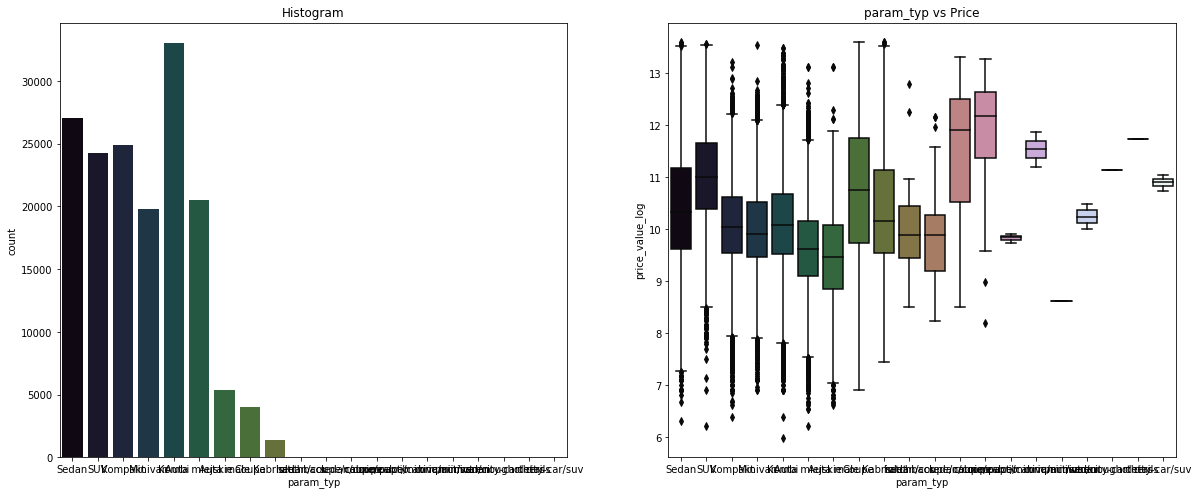

122: param_emisja_co2 [1.94%=3117/160616 #219]: 
130: param_miesięczna_rata [0.45%=727/160616 #533]: 
131: param_wersja [77.49%=124457/160616 #522]: 
160: new_cat_price_value [66.30%=106494/160616 #20]: 
perc_65    5698
perc_40    5665
perc_15    5446
perc_80    5404
perc_50    5370
perc_20    5357
perc_70    5354
perc_90    5340
perc_10    5339
perc_85    5338
perc_95    5328
perc_25    5310
perc_30    5282
perc_05    5280
perc_45    5245
perc_75    5242
perc_60    5217
perc_00    5201
perc_35    5041
perc_55    5037
Name: new_cat_price_value, dtype: int64


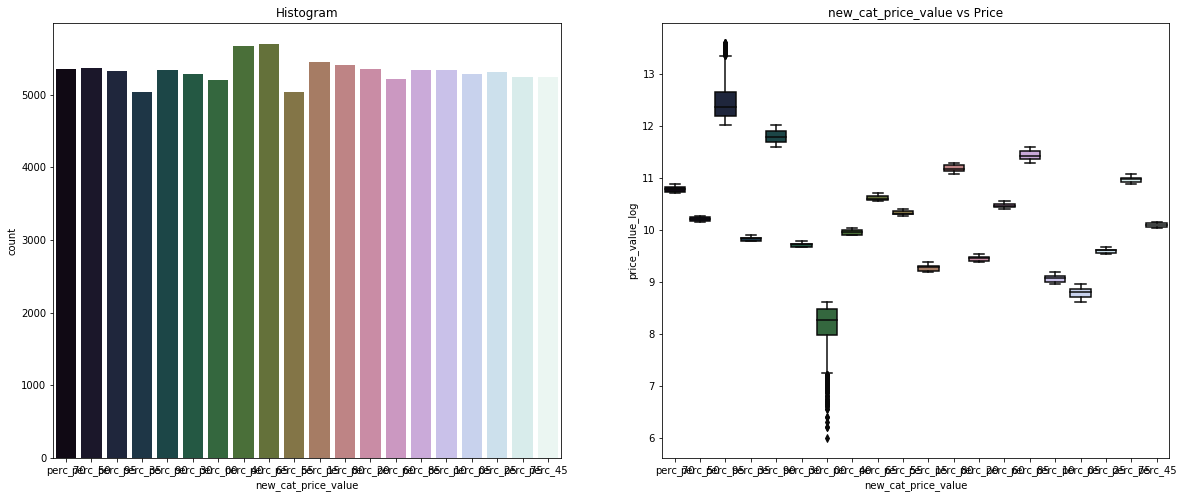

162: param_rodzaj_paliwa_2 [99.90%=160454/160616 #6]: 
Diesel         81448
Benzyna        70632
Benzyna+LPG     7187
Hybryda          960
Elektryczny      125
Benzyna+CNG      102
Name: param_rodzaj_paliwa_2, dtype: int64


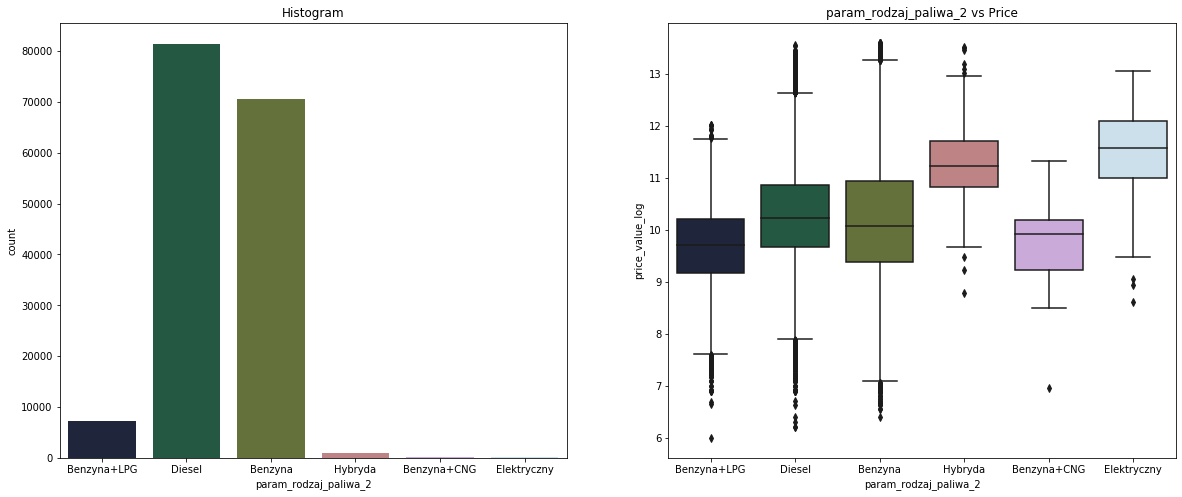

164: param_skrzynia_biegów_2 [94.56%=151871/160616 #5]: 
Manualna                                 110681
Automatyczna hydrauliczna (klasyczna)     27955
Automatyczna dwusprzęgłowa (DCT, DSG)      9629
Automatyczna bezstopniowa (CVT)            2302
Półautomatyczna (ASG, Tiptronic)           1304
Name: param_skrzynia_biegów_2, dtype: int64


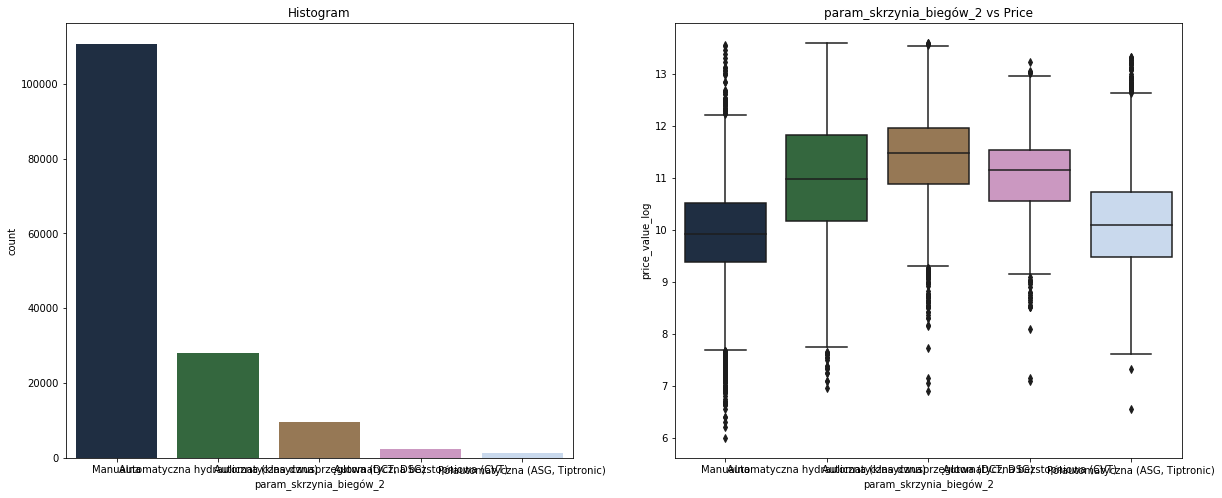

166: param_napęd_2 [84.68%=136003/160616 #5]: 
Na przednie koła                 99630
Na tylne koła                    12967
4x4 (stały)                      10641
4x4 (dołączany automatycznie)    10341
4x4 (dołączany ręcznie)           2424
Name: param_napęd_2, dtype: int64


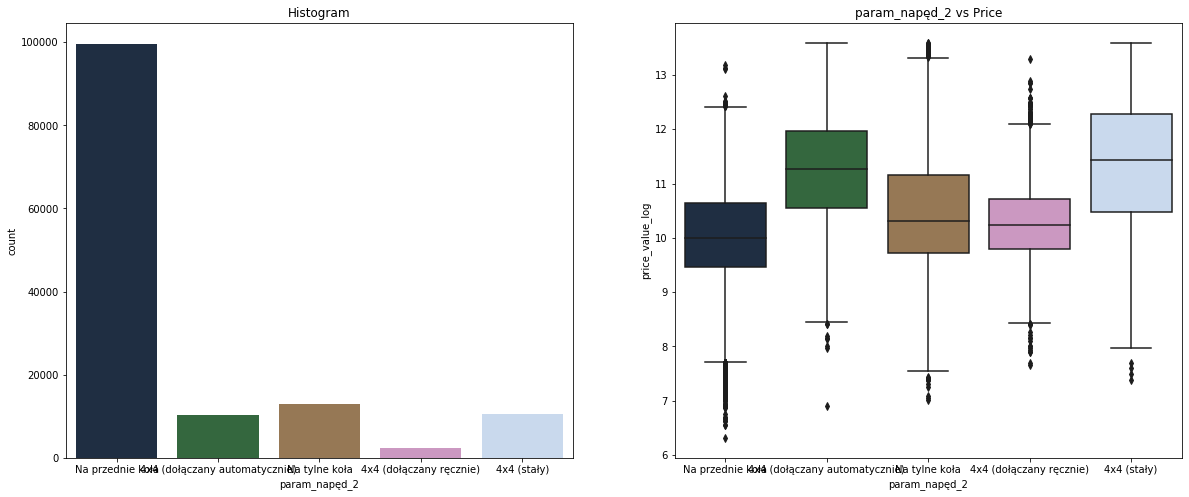

168: param_kolor_2 [99.90%=160455/160616 #14]: 
Czarny        39267
Srebrny       29515
Szary         21927
Biały         17687
Niebieski     17423
Inny kolor    11467
Czerwony       6246
Brązowy        4284
Zielony        3872
Bordowy        2850
Złoty          2448
Beżowy         2113
Fioletowy       736
Żółty           620
Name: param_kolor_2, dtype: int64


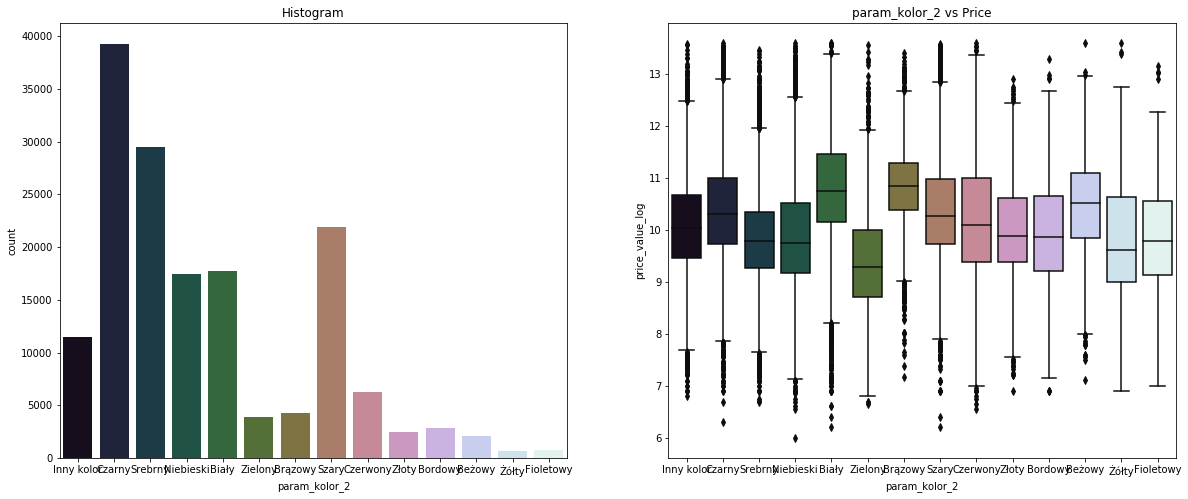

171: vin_where [100.00%=160616/160616 #42]: 
172: vin_flex_fuel [100.00%=160616/160616 #1466]: 
173: vin_portrait [100.00%=160616/160616 #6940]: 
174: vin_security [100.00%=160616/160616 #56]: 
175: vin_model [100.00%=160616/160616 #57]: 
176: vin_plant [100.00%=160616/160616 #57]: 
177: param_typ_2 [100.00%=160616/160616 #11]: 
Kombi            33012
Sedan            27052
Kompakt          24864
SUV              24266
Auta miejskie    20538
Minivan          19789
Auta małe         5407
Coupe             4051
Kabriolet         1430
_NA_Inne           164
Hatchback           43
Name: param_typ_2, dtype: int64


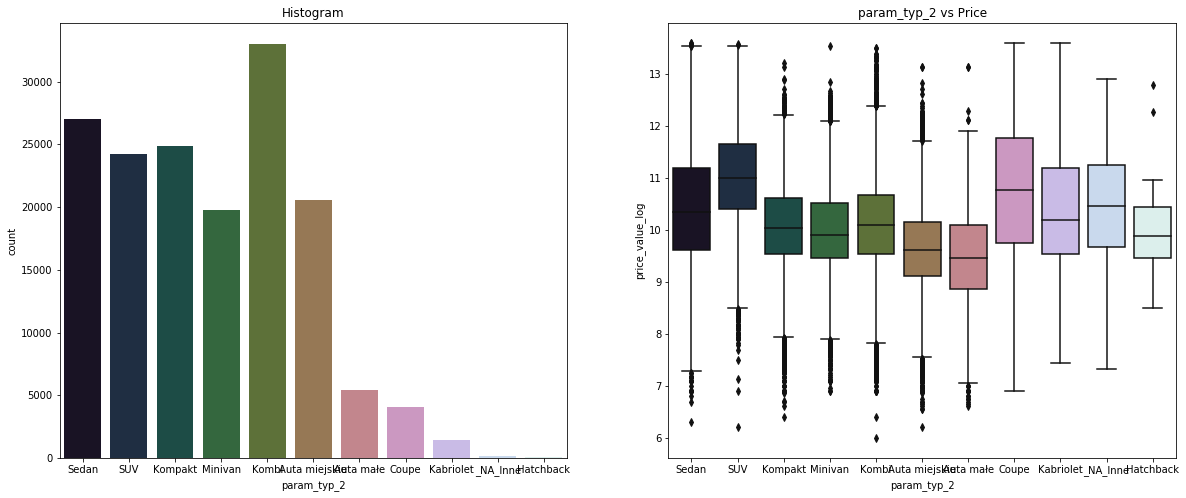

185: seller_wojewodzctwo [100.00%=160616/160616 #17]: 
Mazowieckie            28339
Wielkopolskie          23671
Śląskie                18390
Małopolskie            16104
Dolnośląskie           11977
Łódzkie                 9687
Pomorskie               9669
Lubelskie               7225
Kujawsko-pomorskie      6937
Zachodniopomorskie      5608
Podkarpackie            4886
Świętokrzyskie          4763
Warmińsko-Mazurskie     3757
Lubuskie                3116
Podlaskie               2926
Opolskie                2725
-1                       836
Name: seller_wojewodzctwo, dtype: int64


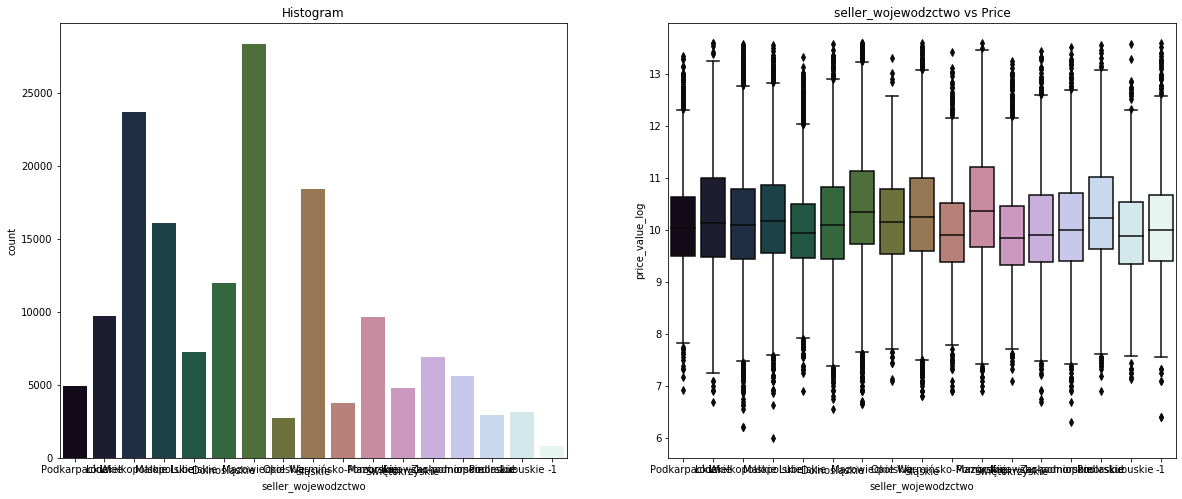

198: seller_miasto [99.91%=160467/160616 #5327]: 
200: encoded_seller_miasto_perc_40 [100.00%=160616/160616 #37]: 


In [8]:
mozo2.print_plots_by_type(total, type =[np.object])

In [ ]:
## modelowanie

In [9]:
train_30 = pd.read_hdf('output/train_30.h5', 'data') 
test_car_ids = train_30['car_id'].values

train_70 = total[~total['car_id'].isin(test_car_ids) & ~total['price_value'].isna()]
train_30 = total[total['car_id'].isin(test_car_ids)]

print(len(total.index))
print(len(total[~total['price_value'].isna()].index))

print(train_70['price_value'].isna().sum())
print(train_30['price_value'].isna().sum())

train_100 = total[~total['price_value'].isna()]
print(train_100['price_value'].isna().sum())

global_min = total[~total['price_value'].isna()].price_value.min()

test = total[total['price_value'].isna()]
train = total[~total['price_value'].isna()]


160616
106494
0
0
0


In [10]:
start_vars = np.sort([
    #### z xgfira
#     'param_ile_lat_temu_produkcja',
# 'param_moc',

# 'encoded_param_napęd_2',
# 'encoded_param_skrzynia_biegów_2',
# 'param_pojemność_skokowa',
# 'param_przebieg',
# 'new_param_napęd_cat',
# 'param_uszkodzony',
# 'encoded_param_typ_2',

# 'feature_alufelgi',
# 'feature_esp__stabilizacja_toru_jazdy_',

# 'feature_elektryczne_szyby_tylne',
# 'param_kierownica_po_prawej__anglik_',
# 'feature_bluetooth',
# 'price_currency_pln',
# 'feature_klimatyzacja_automatyczna',
# 'feature_czujniki_parkowania_tylne',
# 'new_param_marka_pojazdu_cat',
# 'param_bezwypadkowy',
# 'feature_klimatyzacja_dwustrefowa',
# 'feature_elektrycznie_ustawiane_lusterka',
# 'feature_czujniki_parkowania_przednie',
# 'feature_tempomat',
# 'new_param_model_pojazdu_cat',
# 'new_param_wersja_cat',
# 'encoded_param_rodzaj_paliwa_2',
# 'new_param_kod_silnika_cat',
# 'feature_światła_xenonowe',
# 'feature_klimatyzacja_manualna',
# 'new_seller_name_cat',
# 'feature_abs',
# 'param_serwisowany_w_aso',
# 'param_wartość_wykupu_2',
# 'feature_kamera_cofania',
# 'new_param_oferta_od_cat',
# 'feature_asr__kontrola_trakcji_',
# 'feature_cd',

# 'param_miesięczna_rata_2',
# 'new_param_kraj_pochodzenia_cat',

# 'feature_światła_do_jazdy_dziennej',
# 'new_param_liczba_pozostałych_rat_cat',
# 'feature_światła_led',
# 'param_zarejestrowany_w_polsce',
# 'param_liczba_pozostałych_rat_2',
# 'param_pierwsza_rejestracja_date_na',
# 'param_liczba_miejsc_2',
# 'feature_tapicerka_skórzana',
# 'latitude',
# 'longitude',
# 'feature_radio_fabryczne',
# 'created_at_unix',
# 'created_at_unix', 'encoded_param_napęd_2', 'encoded_param_rodzaj_paliwa_2', 'encoded_param_skrzynia_biegów_2', 'feature_abs', 'feature_alufelgi', 'feature_asr__kontrola_trakcji_', 'feature_asystent_parkowania', 'feature_bluetooth', 'feature_cd', 'feature_czujniki_parkowania_przednie', 'feature_elektryczne_szyby_tylne', 'feature_elektrycznie_ustawiane_lusterka', 'feature_esp__stabilizacja_toru_jazdy_', 'feature_gniazdo_sd', 'feature_klimatyzacja_automatyczna', 'feature_klimatyzacja_dwustrefowa', 'feature_klimatyzacja_manualna', 'feature_radio_fabryczne', 'feature_tempomat', 'feature_światła_do_jazdy_dziennej', 'feature_światła_led', 'feature_światła_xenonowe', 'latitude', 'longitude', 'model_XGBRegressor_5856_36229_', 'new_param_kod_silnika_cat', 'new_param_liczba_pozostałych_rat_cat', 'new_param_marka_pojazdu_cat', 'new_param_model_pojazdu_cat', 'new_param_napęd_cat', 'new_param_oferta_od_cat', 'new_param_vin_cat', 'new_param_wersja_cat', 'new_seller_name_cat', 'param_bezwypadkowy', 'param_ile_lat_temu_produkcja', 'param_kierownica_po_prawej__anglik_', 'param_leasing', 'param_liczba_miejsc_2', 'param_moc', 'param_pierwsza_rejestracja_date_na', 'param_pojemność_skokowa', 'param_przebieg', 'param_rok_produkcji', 'param_serwisowany_w_aso', 'param_tuning', 'param_uszkodzony', 'param_wartość_wykupu_2', 'param_zarejestrowany_w_polsce', 'price_currency_pln'
'encoded_param_rodzaj_paliwa_2', 'feature_abs', 'feature_asr__kontrola_trakcji_', 'feature_bluetooth', 'feature_centralny_zamek', 'feature_elektrycznie_ustawiane_fotele', 'feature_elektrycznie_ustawiane_lusterka', 'feature_gniazdo_sd', 'feature_immobilizer', 'feature_isofix', 'feature_klimatyzacja_automatyczna', 'feature_klimatyzacja_manualna', 'feature_komputer_pokładowy', 'feature_ogrzewanie_postojowe', 'feature_podgrzewane_tylne_siedzenia', 'feature_poduszka_powietrzna_kierowcy', 'feature_radio_fabryczne', 'feature_szyberdach', 'feature_tapicerka_skórzana', 'feature_tempomat', 'feature_zmieniarka_cd', 'feature_światła_led', 'feature_światła_przeciwmgielne', 'model_8790', 'new_param_kolor_cat', 'new_param_liczba_pozostałych_rat_cat', 'new_param_marka_pojazdu_cat', 'new_param_model_pojazdu_cat', 'new_param_oferta_od_cat', 'new_param_opłata_początkowa_cat', 'new_param_wersja_cat', 'new_seller_name_cat', 'new_vin_flex_fuel_cat', 'new_vin_model_cat', 'new_vin_portrait_cat', 'new_vin_security_cat', 'ogloszenie_rok', 'param_bezwypadkowy', 'param_filtr_cząstek_stałych', 'param_homologacja_ciężarowa', 'param_ile_lat_temu_produkcja', 'param_liczba_pozostałych_rat_2', 'param_matowy', 'param_metalik', 'param_moc', 'param_perłowy', 'param_pierwsza_rejestracja_10_lat', 'param_pierwsza_rejestracja_ten_rok', 'param_przebieg', 'param_serwisowany_w_aso', 'param_tuning'
])

# 'model_8790' = car_price_log_Vladimir_categories_xgb.csv; 5637.56722; "opis": "Vladimir z kategorialnymi mae na train_30"

black_list = ['car_id', 'price_details', 'price_value', 'price_value_log', 'price_value_pln', 'price_value_pln_log_transl', 'new_cat_price_value',
#               *[x for x in total.columns if x.startswith('model_')],
              'model_XGBRegressor_2195_24982_po_hiperopcie_caly_train', #train_100, przeuczony
              'model_XGBRegressor_3293_22097_', #train_100
              'longitude_na_mean', 'latitude_na_mean', #gorsze w xbfir
              *total.columns[total.isnull().any()],
             ]

feats3 = total.select_dtypes(include=[np.number, np.bool]).columns
feats3 = [x for x in feats3 if x not in black_list]
feats3 = np.sort(feats3)
print(total[feats3].info(verbose=True))
print(total[feats3].columns[total[feats3].isnull().any()])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160616 entries, 0 to 160615
Data columns (total 163 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   created_at_unix                                     float64
 1   created_at_unix_na_mean                             float64
 2   encoded_param_kolor_2                               int64  
 3   encoded_param_napęd_2                               int64  
 4   encoded_param_rodzaj_paliwa_2                       int64  
 5   encoded_param_skrzynia_biegów_2                     int64  
 6   encoded_param_typ_2                                 int64  
 7   encoded_seller_miasto_297                           int64  
 8   feature_abs                                         bool   
 9   feature_alarm                                       bool   
 10  feature_alufelgi                                    bool   
 11  feature_asr__kontrola_trakcji_        

In [11]:
import contextlib
import warnings
warnings.filterwarnings("ignore")

params = {    
    'n_jobs': 12, 

    'n_estimators': 50, 
    'learning_rate': 0.3, 
    'subsample': 0.5, 
    'colsample_bytree': 0.9,
    'max_depth': 10, 
}

mae_global_min = 2615.5414745879784
big_iter = 0

current_vars=start_vars
all_vars = feats3 #maksymalny set

while True:

    added_so_far = []
    removed_so_far = []

    last_added = None
    last_removed = None

    last_trial = False
    big_iter += 1
    print("START iter=" + str(big_iter) + ', mae_global_min=' + str(mae_global_min))
    
    while True:
        with contextlib.redirect_stdout(None):
            current_vars, last_added, added_so_far, last_removed, removed_so_far, last_trial =  mozo2.mutate_rand_feature(current_vars, all_vars, added_so_far, removed_so_far)
        print('added: ' + last_added)
        print('removed: ' + last_removed)
        print('len: ' + str(len(current_vars)))
        
        mae, r2, model, model_cl, learning_curve_plot = mozo2.train_and_submit(train_70, train_30, total.loc[total['price_value'].isna(),], 
                     current_vars, global_min, 
                     xgb.XGBRegressor, params, digitize=None, subfolder='XGBRegressor',
                     file_sufix = 'from_xgbfir_1', opis='', 
                     learning_curve = False, 
                     add_model_column_min = -1, total = total, 
                     save_min=mae_global_min, kaggle_min=-1)

        if mae < mae_global_min:
            mae_global_min = mae
            print('Improvement: ' + last_removed + ' -> ' + last_added)
        else:
            current_vars = mozo2.replace_feature(current_vars, last_added, last_removed)
            print('Rollback: ' + last_added + ' -> ' + last_removed)
        print('=============================================' + str(mae_global_min)+ '=============================================')

        if last_trial == True: 
            print("END iter=" + str(big_iter) + ', mae_global_min=' + str(mae))
            break

START iter=1, mae_global_min=2615.5414745879784
added: feature_regulowane_zawieszenie
removed: param_pierwsza_rejestracja_ten_rok
len: 51
mea: 2892.66912413181
r2: 0.9780779784839738
Rollback: feature_regulowane_zawieszenie -> param_pierwsza_rejestracja_ten_rok
=============================================2615.5414745879784=============================================
added: new_param_kraj_pochodzenia_cat
removed: feature_bluetooth
len: 51
mea: 3195.549095962908
r2: 0.9753726049723908
Rollback: new_param_kraj_pochodzenia_cat -> feature_bluetooth
=============================================2615.5414745879784=============================================
added: new_param_rodzaj_paliwa_cat
removed: param_homologacja_ciężarowa
len: 51
mea: 2813.970685273903
r2: 0.9776461421247482
Rollback: new_param_rodzaj_paliwa_cat -> param_homologacja_ciężarowa
=============================================2615.5414745879784=============================================
added: feature_asystent_parkowania


mea: 2804.2422047047726
r2: 0.9783498350414057
Rollback: feature_radio_niefabryczne -> encoded_param_rodzaj_paliwa_2
=============================================2615.5414745879784=============================================
added: created_at_unix
removed: ogloszenie_rok
len: 51
mea: 2931.8645806357304
r2: 0.9763730227088039
Rollback: created_at_unix -> ogloszenie_rok
=============================================2615.5414745879784=============================================
added: new_param_stan_cat
removed: feature_elektrycznie_ustawiane_fotele
len: 51
mea: 3191.4048625708897
r2: 0.976040479644867
Rollback: new_param_stan_cat -> feature_elektrycznie_ustawiane_fotele
=============================================2615.5414745879784=============================================
added: feature_wspomaganie_kierownicy
removed: param_ile_lat_temu_produkcja
len: 51
mea: 2998.6579932934346
r2: 0.9754616335037469
Rollback: feature_wspomaganie_kierownicy -> param_ile_lat_temu_produkcja
=========

mea: 2885.212341595229
r2: 0.9770241160675076
Rollback: feature_alufelgi -> new_vin_portrait_cat
=============================================2615.5414745879784=============================================
added: param_akryl__niemetalizowany_
removed: feature_ogrzewanie_postojowe
len: 51
mea: 3169.8927272197366
r2: 0.9763134486942122
Rollback: param_akryl__niemetalizowany_ -> feature_ogrzewanie_postojowe
=============================================2615.5414745879784=============================================
added: param_uszkodzony
removed: param_homologacja_ciężarowa
len: 51
mea: 2819.474517566923
r2: 0.9777214294332716
Rollback: param_uszkodzony -> param_homologacja_ciężarowa
=============================================2615.5414745879784=============================================
added: feature_poduszki_boczne_tylne
removed: feature_isofix
len: 51
mea: 2794.6482658007258
r2: 0.9789146235633035
Rollback: feature_poduszki_boczne_tylne -> feature_isofix
===========================

mea: 2862.96011318599
r2: 0.977896823325989
Rollback: encoded_seller_miasto_297 -> feature_centralny_zamek
=============================================2615.5414745879784=============================================
added: feature_elektrochromatyczne_lusterka_boczne
removed: param_perłowy
len: 51
mea: 2897.847684516638
r2: 0.9778546289680005
Rollback: feature_elektrochromatyczne_lusterka_boczne -> param_perłowy
=============================================2615.5414745879784=============================================
added: longitude
removed: feature_światła_przeciwmgielne
len: 51
mea: 2867.322191198674
r2: 0.9781212585397158
Rollback: longitude -> feature_światła_przeciwmgielne
=============================================2615.5414745879784=============================================
added: new_param_wartość_wykupu_cat
removed: param_perłowy
len: 51
mea: 2831.8702146466744
r2: 0.9780146311651027
Rollback: new_param_wartość_wykupu_cat -> param_perłowy
================================

mea: 2823.309844108542
r2: 0.9780123610040874
Rollback: feature_kamera_cofania -> feature_tempomat
=============================================2615.5414745879784=============================================
added: param_miesięczna_rata_2
removed: model_8790
len: 51
mea: 8348.680361068313
r2: 0.8974690296509846
Rollback: param_miesięczna_rata_2 -> model_8790
=============================================2615.5414745879784=============================================
added: latitude
removed: param_pierwsza_rejestracja_10_lat
len: 51
mea: 2934.7335361261185
r2: 0.9771828917910316
Rollback: latitude -> param_pierwsza_rejestracja_10_lat
=============================================2615.5414745879784=============================================
added: feature_elektryczne_szyby_przednie
removed: new_param_opłata_początkowa_cat
len: 51
mea: 2953.3710638696143
r2: 0.9763011564353428
Rollback: feature_elektryczne_szyby_przednie -> new_param_opłata_początkowa_cat
=================================

mea: 2923.8572582388842
r2: 0.9756493871015613
Rollback: feature_podgrzewane_przednie_siedzenia -> new_param_opłata_początkowa_cat
=============================================2615.5414745879784=============================================
added: feature_regulowane_zawieszenie
removed: feature_tapicerka_skórzana
len: 51
mea: 2850.6860591972504
r2: 0.9772878827762279
Rollback: feature_regulowane_zawieszenie -> feature_tapicerka_skórzana
=============================================2615.5414745879784=============================================
added: feature_elektrochromatyczne_lusterko_wsteczne
removed: new_param_opłata_początkowa_cat
len: 51
mea: 2947.370511510639
r2: 0.9764962036943782
Rollback: feature_elektrochromatyczne_lusterko_wsteczne -> new_param_opłata_początkowa_cat
=============================================2615.5414745879784=============================================
added: encoded_param_kolor_2
removed: feature_elektrycznie_ustawiane_fotele
len: 51
mea: 2824.081703932

mea: 2841.130195874843
r2: 0.9779228402425507
Rollback: new_param_pierwsza_rejestracja_cat -> param_matowy
=============================================2615.5414745879784=============================================
added: feature_hak
removed: feature_światła_przeciwmgielne
len: 51
mea: 2838.235499835691
r2: 0.9778275090593724
Rollback: feature_hak -> feature_światła_przeciwmgielne
=============================================2615.5414745879784=============================================
added: new_param_kod_silnika_cat
removed: feature_zmieniarka_cd
len: 51
mea: 3203.509074386162
r2: 0.974482974013625
Rollback: new_param_kod_silnika_cat -> feature_zmieniarka_cd
=============================================2615.5414745879784=============================================
added: feature_poduszka_powietrzna_chroniąca_kolana
removed: feature_centralny_zamek
len: 51
mea: 2807.8266768776934
r2: 0.9782218274826004
Rollback: feature_poduszka_powietrzna_chroniąca_kolana -> feature_centralny_zam

mea: 2859.808848170375
r2: 0.9770803760533453
Rollback: new_param_rodzaj_paliwa_cat -> new_param_liczba_pozostałych_rat_cat
=============================================2615.5414745879784=============================================
added: feature_nawigacja_gps
removed: new_vin_security_cat
len: 51
mea: 2902.726153433668
r2: 0.9773182776414224
Rollback: feature_nawigacja_gps -> new_vin_security_cat
=============================================2615.5414745879784=============================================
added: feature_elektryczne_szyby_tylne
removed: feature_szyberdach
len: 51
mea: 2834.0742837515154
r2: 0.9779429682765192
Rollback: feature_elektryczne_szyby_tylne -> feature_szyberdach
=============================================2615.5414745879784=============================================
added: feature_ogranicznik_prędkości
removed: feature_zmieniarka_cd
len: 51
mea: 2843.0140092827846
r2: 0.9780880806711637
Rollback: feature_ogranicznik_prędkości -> feature_zmieniarka_cd
======

mea: 2808.5079421108644
r2: 0.97864177359825
Rollback: feature_elektryczne_szyby_przednie -> feature_elektrycznie_ustawiane_lusterka
=============================================2615.5414745879784=============================================
added: feature_asystent_parkowania
removed: new_param_model_pojazdu_cat
len: 51
mea: 2966.124812193359
r2: 0.9764513634792231
Rollback: feature_asystent_parkowania -> new_param_model_pojazdu_cat
=============================================2615.5414745879784=============================================
added: feature_podgrzewane_przednie_siedzenia
removed: feature_tempomat
len: 51
mea: 2806.7947144297445
r2: 0.9781303985538654
Rollback: feature_podgrzewane_przednie_siedzenia -> feature_tempomat
=============================================2615.5414745879784=============================================
added: ogloszenie_dzien_tyg
removed: feature_tapicerka_skórzana
len: 51
mea: 3223.43437547714
r2: 0.9748544435770413
Rollback: ogloszenie_dzien_tyg -

mea: 2822.3738677676483
r2: 0.9777181468270026
Rollback: new_param_typ_cat -> param_filtr_cząstek_stałych
=============================================2615.5414745879784=============================================
added: param_uszkodzony
removed: new_vin_portrait_cat
len: 51
mea: 2784.2319935486935
r2: 0.9786644198024692
Rollback: param_uszkodzony -> new_vin_portrait_cat
=============================================2615.5414745879784=============================================
added: feature_poduszka_powietrzna_pasażera
removed: feature_podgrzewane_tylne_siedzenia
len: 51
mea: 2849.166974242029
r2: 0.9781504249231407
Rollback: feature_poduszka_powietrzna_pasażera -> feature_podgrzewane_tylne_siedzenia
=============================================2615.5414745879784=============================================
added: feature_wspomaganie_kierownicy
removed: feature_elektrycznie_ustawiane_lusterka
len: 51
mea: 2836.4727351966217
r2: 0.9775234391878421
Rollback: feature_wspomaganie_kierow

mea: 2858.286240570528
r2: 0.9774762667655542
Rollback: feature_poduszki_boczne_przednie -> feature_gniazdo_sd
=============================================2615.5414745879784=============================================
added: new_cat_seller_address
removed: feature_abs
len: 51
mea: 3186.9988567504865
r2: 0.9749243075673932
Rollback: new_cat_seller_address -> feature_abs
=============================================2615.5414745879784=============================================
added: param_opłata_początkowa_2
removed: feature_asr__kontrola_trakcji_
len: 51
mea: 3192.325724693188
r2: 0.973804070889893
Rollback: param_opłata_początkowa_2 -> feature_asr__kontrola_trakcji_
=============================================2615.5414745879784=============================================
added: new_param_emisja_co2_cat
removed: feature_podgrzewane_tylne_siedzenia
len: 51
mea: 3226.4290617759607
r2: 0.9750903996810147
Rollback: new_param_emisja_co2_cat -> feature_podgrzewane_tylne_siedzenia
======

mea: 2853.4907592130016
r2: 0.9774018476250083
Rollback: latitude -> feature_immobilizer
=============================================2615.5414745879784=============================================
added: param_rok_produkcji_ten_rok
removed: param_perłowy
len: 51
mea: 2811.3294128017938
r2: 0.9779736331569873
Rollback: param_rok_produkcji_ten_rok -> param_perłowy
=============================================2615.5414745879784=============================================
added: feature_mp3
removed: feature_światła_przeciwmgielne
len: 51
mea: 2841.2327454753017
r2: 0.9776223207151574
Rollback: feature_mp3 -> feature_światła_przeciwmgielne
=============================================2615.5414745879784=============================================
added: param_leasing
removed: new_param_liczba_pozostałych_rat_cat
len: 51
mea: 2804.3193592852576
r2: 0.97869413673026
Rollback: param_leasing -> new_param_liczba_pozostałych_rat_cat
=============================================2615.541474587978

mea: 2811.91403547741
r2: 0.9786276236145547
Rollback: feature_mp3 -> feature_komputer_pokładowy
=============================================2615.5414745879784=============================================
added: feature_wspomaganie_kierownicy
removed: new_vin_flex_fuel_cat
len: 51
mea: 2928.7842634027693
r2: 0.9767994814274648
Rollback: feature_wspomaganie_kierownicy -> new_vin_flex_fuel_cat
=============================================2615.5414745879784=============================================
added: feature_poduszka_powietrzna_chroniąca_kolana
removed: model_8790
len: 51
mea: 8363.283486137543
r2: 0.8991427395876468
Rollback: feature_poduszka_powietrzna_chroniąca_kolana -> model_8790
=============================================2615.5414745879784=============================================
added: feature_kamera_cofania
removed: param_pierwsza_rejestracja_10_lat
len: 51
mea: 2903.3225797390533
r2: 0.9777226729698217
Rollback: feature_kamera_cofania -> param_pierwsza_rejestracja_

mea: 2920.9197039067635
r2: 0.9764333156472741
Rollback: feature_hud__wyświetlacz_przezierny_ -> new_param_wersja_cat
=============================================2615.5414745879784=============================================
added: feature_przyciemniane_szyby
removed: feature_immobilizer
len: 51
mea: 2841.5325007476513
r2: 0.9779830234227198
Rollback: feature_przyciemniane_szyby -> feature_immobilizer
=============================================2615.5414745879784=============================================
added: feature_gniazdo_usb
removed: new_param_liczba_pozostałych_rat_cat
len: 51
mea: 2913.281007496582
r2: 0.9764570860564266
Rollback: feature_gniazdo_usb -> new_param_liczba_pozostałych_rat_cat
=============================================2615.5414745879784=============================================
added: feature_poduszka_powietrzna_pasażera
removed: param_homologacja_ciężarowa
len: 51
mea: 2894.0815110804647
r2: 0.9774759552532603
Rollback: feature_poduszka_powietrzna_pasa

mea: 2912.822765332007
r2: 0.9778529047766056
Rollback: feature_czujniki_parkowania_tylne -> param_metalik
=============================================2615.5414745879784=============================================
added: encoded_seller_miasto_297
removed: param_metalik
len: 51
mea: 2948.2282192513944
r2: 0.9765036093445579
Rollback: encoded_seller_miasto_297 -> param_metalik
=============================================2615.5414745879784=============================================
added: feature_światła_xenonowe
removed: feature_komputer_pokładowy
len: 51
mea: 2833.2886622341616
r2: 0.978440852653712
Rollback: feature_światła_xenonowe -> feature_komputer_pokładowy
=============================================2615.5414745879784=============================================
added: feature_tapicerka_welurowa
removed: feature_światła_led
len: 51
mea: 2776.310799579842
r2: 0.9789223451987384
Rollback: feature_tapicerka_welurowa -> feature_światła_led
======================================

mea: 2828.211947085406
r2: 0.9779314898537098
Rollback: feature_klimatyzacja_czterostrefowa -> feature_bluetooth
=============================================2615.5414745879784=============================================
added: param_pierwsza_rejestracja_poprzedni_rok
removed: param_przebieg
len: 51
mea: 2813.4800928539794
r2: 0.9767503150138254
Rollback: param_pierwsza_rejestracja_poprzedni_rok -> param_przebieg
=============================================2615.5414745879784=============================================
added: new_param_pierwsza_rejestracja_cat
removed: feature_zmieniarka_cd
len: 51
mea: 3175.4809025709033
r2: 0.9763851252622172
Rollback: new_param_pierwsza_rejestracja_cat -> feature_zmieniarka_cd
=============================================2615.5414745879784=============================================
added: latitude
removed: param_przebieg
len: 51
mea: 2960.991025755434
r2: 0.9752078991232249
Rollback: latitude -> param_przebieg
===================================

mea: 2834.6817579682356
r2: 0.9776810621237347
Rollback: feature_radio_niefabryczne -> feature_światła_przeciwmgielne
=============================================2615.5414745879784=============================================
added: feature_odtwarzacz_dvd
removed: feature_tempomat
len: 51
mea: 2812.2150737993343
r2: 0.9787371800065128
Rollback: feature_odtwarzacz_dvd -> feature_tempomat
=============================================2615.5414745879784=============================================
added: encoded_param_skrzynia_biegów_2
removed: feature_zmieniarka_cd
len: 51
mea: 2831.355066123603
r2: 0.97796344563927
Rollback: encoded_param_skrzynia_biegów_2 -> feature_zmieniarka_cd
=============================================2615.5414745879784=============================================
added: ogloszenie_dni_wisi
removed: feature_bluetooth
len: 51
mea: 3209.4264145970433
r2: 0.9754640443904161
Rollback: ogloszenie_dni_wisi -> feature_bluetooth
==========================================

mea: 2810.717968329255
r2: 0.9786308558025278
Rollback: new_param_vin_cat -> new_vin_flex_fuel_cat
=============================================2615.5414745879784=============================================
added: feature_klimatyzacja_czterostrefowa
removed: feature_asr__kontrola_trakcji_
len: 51
mea: 2833.3597104680475
r2: 0.9780955421555848
Rollback: feature_klimatyzacja_czterostrefowa -> feature_asr__kontrola_trakcji_
=============================================2615.5414745879784=============================================
added: feature_cd
removed: feature_klimatyzacja_automatyczna
len: 51
mea: 2831.152368974146
r2: 0.9784802384594219
Rollback: feature_cd -> feature_klimatyzacja_automatyczna
=============================================2615.5414745879784=============================================
added: encoded_seller_miasto_297
removed: param_filtr_cząstek_stałych
len: 51
mea: 2914.4462706829877
r2: 0.977716114738809
Rollback: encoded_seller_miasto_297 -> param_filtr_cząstek_

mea: 2833.6702762220893
r2: 0.9771462181532508
Rollback: new_param_skrzynia_biegów_cat -> new_seller_name_cat
=============================================2615.5414745879784=============================================
added: param_rok_produkcji_poprzedni_rok
removed: feature_elektrycznie_ustawiane_lusterka
len: 51
mea: 3187.302910160682
r2: 0.9736688063881141
Rollback: param_rok_produkcji_poprzedni_rok -> feature_elektrycznie_ustawiane_lusterka
=============================================2615.5414745879784=============================================
added: feature_wspomaganie_kierownicy
removed: new_param_kolor_cat
len: 51
mea: 2898.010120204699
r2: 0.9779514423062241
Rollback: feature_wspomaganie_kierownicy -> new_param_kolor_cat
=============================================2615.5414745879784=============================================
added: param_zarejestrowany_jako_zabytek
removed: param_filtr_cząstek_stałych
len: 51
mea: 2791.5593816151572
r2: 0.9783461933846709
Rollback: para

mea: 3177.198713283004
r2: 0.9751903043027762
Rollback: param_liczba_drzwi -> feature_klimatyzacja_manualna
=============================================2615.5414745879784=============================================
added: param_vin_len
removed: feature_szyberdach
len: 51
mea: 3232.2018696868136
r2: 0.972395437592083
Rollback: param_vin_len -> feature_szyberdach
=============================================2615.5414745879784=============================================
added: ogloszenie_dzien_tyg
removed: feature_bluetooth
len: 51
mea: 3179.6381619177396
r2: 0.9764410385612478
Rollback: ogloszenie_dzien_tyg -> feature_bluetooth
=============================================2615.5414745879784=============================================
added: feature_światła_do_jazdy_dziennej
removed: new_param_kolor_cat
len: 51
mea: 2902.114561558772
r2: 0.9770128890472896
Rollback: feature_światła_do_jazdy_dziennej -> new_param_kolor_cat
=============================================2615.5414745879784

mea: 2936.423732010437
r2: 0.9765410058448936
Rollback: created_at_unix_na_mean -> param_tuning
=============================================2615.5414745879784=============================================
added: param_vat_discount
removed: param_metalik
len: 51
mea: 2794.399013513771
r2: 0.9786488231718606
Rollback: param_vat_discount -> param_metalik
=============================================2615.5414745879784=============================================
added: param_leasing
removed: feature_tapicerka_skórzana
len: 51
mea: 3175.0985879667805
r2: 0.9751384799665954
Rollback: param_leasing -> feature_tapicerka_skórzana
=============================================2615.5414745879784=============================================
added: model_XGBRegressor_5856_36229_
removed: feature_światła_przeciwmgielne
len: 51
mea: 5941.4697161274735
r2: 0.9374149372186115
Rollback: model_XGBRegressor_5856_36229_ -> feature_światła_przeciwmgielne
=============================================2615.5414

mea: 2928.609329665067
r2: 0.9770948688624886
Rollback: feature_regulowane_zawieszenie -> param_matowy
=============================================2615.5414745879784=============================================
added: new_param_kraj_pochodzenia_cat
removed: new_vin_security_cat
len: 51
mea: 2803.715859718336
r2: 0.9788655819619256
Rollback: new_param_kraj_pochodzenia_cat -> new_vin_security_cat
=============================================2615.5414745879784=============================================
added: new_cat_seller_address
removed: param_homologacja_ciężarowa
len: 51
mea: 2836.8101180151584
r2: 0.9773591802886621
Rollback: new_cat_seller_address -> param_homologacja_ciężarowa
=============================================2615.5414745879784=============================================
added: feature_poduszka_powietrzna_pasażera
removed: param_przebieg
len: 51
mea: 2977.4499143052576
r2: 0.9756386672356131
Rollback: feature_poduszka_powietrzna_pasażera -> param_przebieg
=========

mea: 3213.8391514003824
r2: 0.9749154893438954
Rollback: ogloszenie_dni_wisi -> feature_szyberdach
=============================================2615.5414745879784=============================================
added: new_param_vin_cat
removed: param_pierwsza_rejestracja_ten_rok
len: 51
mea: 2800.6947400893077
r2: 0.9774842245406514
Rollback: new_param_vin_cat -> param_pierwsza_rejestracja_ten_rok
=============================================2615.5414745879784=============================================
added: feature_poduszka_powietrzna_chroniąca_kolana
removed: feature_immobilizer
len: 51
mea: 2825.6705083331967
r2: 0.9778320268245039
Rollback: feature_poduszka_powietrzna_chroniąca_kolana -> feature_immobilizer
=============================================2615.5414745879784=============================================
added: feature_cd
removed: feature_komputer_pokładowy
len: 51
mea: 2803.8931200870793
r2: 0.9785266034119634
Rollback: feature_cd -> feature_komputer_pokładowy
==========

mea: 2947.370511510639
r2: 0.9764962036943782
Rollback: feature_elektrochromatyczne_lusterko_wsteczne -> new_param_opłata_początkowa_cat
=============================================2615.5414745879784=============================================
added: feature_hud__wyświetlacz_przezierny_
removed: new_vin_model_cat
len: 51
mea: 2908.103988826751
r2: 0.9772329112221828
Rollback: feature_hud__wyświetlacz_przezierny_ -> new_vin_model_cat
=============================================2615.5414745879784=============================================
added: feature_poduszki_boczne_tylne
removed: feature_światła_led
len: 51
mea: 2818.7064682648825
r2: 0.9777253422953772
Rollback: feature_poduszki_boczne_tylne -> feature_światła_led
=============================================2615.5414745879784=============================================
added: new_param_miesięczna_rata_cat
removed: param_matowy
len: 51
mea: 2847.1013077210064
r2: 0.9784706616964912
Rollback: new_param_miesięczna_rata_cat -> pa

mea: 2885.5027652600234
r2: 0.9815158461166906
Rollback: model_XGBRegressor_3422_09438_start_vars_train_100 -> param_matowy
=============================================2615.5414745879784=============================================
added: param_liczba_miejsc_2
removed: feature_asr__kontrola_trakcji_
len: 51
mea: 3193.009289880286
r2: 0.9761347096849851
Rollback: param_liczba_miejsc_2 -> feature_asr__kontrola_trakcji_
=============================================2615.5414745879784=============================================
added: feature_nawigacja_gps
removed: feature_szyberdach
len: 51
mea: 2822.22108246225
r2: 0.977904877865939
Rollback: feature_nawigacja_gps -> feature_szyberdach
=============================================2615.5414745879784=============================================
added: feature_poduszki_boczne_przednie
removed: feature_tempomat
len: 51
mea: 2816.5517292555583
r2: 0.9779401449232651
Rollback: feature_poduszki_boczne_przednie -> feature_tempomat
=============

mea: 2813.8185480061666
r2: 0.9784175243204661
Rollback: feature_regulowane_zawieszenie -> feature_ogrzewanie_postojowe
=============================================2615.5414745879784=============================================
added: ogloszenie_dni_wisi
removed: model_8790
len: 51
mea: 8571.382763926033
r2: 0.8887653440140292
Rollback: ogloszenie_dni_wisi -> model_8790
=============================================2615.5414745879784=============================================
added: encoded_param_typ_2
removed: param_homologacja_ciężarowa
len: 51
mea: 2958.0988914997
r2: 0.976023253995416
Rollback: encoded_param_typ_2 -> param_homologacja_ciężarowa
=============================================2615.5414745879784=============================================
added: feature_łopatki_zmiany_biegów
removed: feature_abs
len: 51
mea: 2815.9527178038666
r2: 0.9783804239628608
Rollback: feature_łopatki_zmiany_biegów -> feature_abs
=============================================2615.5414745879784=

mea: 2907.757701693672
r2: 0.9769295058011943
Rollback: feature_czujnik_deszczu -> new_vin_model_cat
=============================================2615.5414745879784=============================================
added: param_zarejestrowany_jako_zabytek
removed: feature_asr__kontrola_trakcji_
len: 51
mea: 3210.428188859482
r2: 0.9749155570171576
Rollback: param_zarejestrowany_jako_zabytek -> feature_asr__kontrola_trakcji_
=============================================2615.5414745879784=============================================
added: new_vin_where_cat
removed: param_ile_lat_temu_produkcja
len: 51
mea: 2810.717521886842
r2: 0.9787454479060086
Rollback: new_vin_where_cat -> param_ile_lat_temu_produkcja
=============================================2615.5414745879784=============================================
added: model_XGBRegressor_2608_37590_po_hiperopcie
removed: feature_poduszka_powietrzna_kierowcy
len: 51
mea: 2846.3386097240978
r2: 0.9791143538105525
Rollback: model_XGBRegressor_2

mea: 2912.125669281771
r2: 0.9769606214072448
Rollback: feature_kamera_cofania -> new_vin_flex_fuel_cat
=============================================2615.5414745879784=============================================
added: new_param_pierwsza_rejestracja_cat
removed: feature_podgrzewane_tylne_siedzenia
len: 51
mea: 3164.269336955434
r2: 0.9765882218799137
Rollback: new_param_pierwsza_rejestracja_cat -> feature_podgrzewane_tylne_siedzenia
=============================================2615.5414745879784=============================================
added: feature_asystent_pasa_ruchu
removed: new_param_opłata_początkowa_cat
len: 51
mea: 2924.971655446901
r2: 0.977824932471542
Rollback: feature_asystent_pasa_ruchu -> new_param_opłata_początkowa_cat
=============================================2615.5414745879784=============================================
added: feature_mp3
removed: new_param_liczba_pozostałych_rat_cat
len: 51
mea: 2906.752062836825
r2: 0.9777106566717751
Rollback: feature_mp3 -

mea: 2778.5506989523956
r2: 0.9780851070479417
Rollback: param_rok_produkcji_poprzedni_rok -> new_param_marka_pojazdu_cat
=============================================2615.5414745879784=============================================
added: new_param_rodzaj_paliwa_cat
removed: param_pierwsza_rejestracja_ten_rok
len: 51
mea: 2819.3088088897844
r2: 0.9783682703725143
Rollback: new_param_rodzaj_paliwa_cat -> param_pierwsza_rejestracja_ten_rok
=============================================2615.5414745879784=============================================
added: param_pierwsza_rejestracja_poprzedni_rok
removed: feature_podgrzewane_tylne_siedzenia
len: 51
mea: 3209.3176815116653
r2: 0.9750388381475843
Rollback: param_pierwsza_rejestracja_poprzedni_rok -> feature_podgrzewane_tylne_siedzenia
=============================================2615.5414745879784=============================================
added: feature_elektryczne_szyby_tylne
removed: new_vin_flex_fuel_cat
len: 51
mea: 2902.0523837802284
r

mea: 2788.930152741142
r2: 0.9792256040281814
Rollback: feature_przyciemniane_szyby -> encoded_param_rodzaj_paliwa_2
=============================================2615.5414745879784=============================================
added: param_leasing
removed: param_pierwsza_rejestracja_10_lat
len: 51
mea: 2802.6603833098748
r2: 0.9788424094624332
Rollback: param_leasing -> param_pierwsza_rejestracja_10_lat
=============================================2615.5414745879784=============================================
added: param_rok_produkcji
removed: param_pierwsza_rejestracja_10_lat
len: 51
mea: 2803.815448137849
r2: 0.978209971111995
Rollback: param_rok_produkcji -> param_pierwsza_rejestracja_10_lat
=============================================2615.5414745879784=============================================
added: feature_dach_panoramiczny
removed: param_bezwypadkowy
len: 51
mea: 2895.711763905508
r2: 0.9777106571290891
Rollback: feature_dach_panoramiczny -> param_bezwypadkowy
=============

mea: 2931.9580004054465
r2: 0.9775417189064473
Rollback: feature_tapicerka_welurowa -> param_pierwsza_rejestracja_ten_rok
=============================================2615.5414745879784=============================================
added: feature_cd
removed: feature_zmieniarka_cd
len: 51
mea: 2843.419394109664
r2: 0.9768037124497891
Rollback: feature_cd -> feature_zmieniarka_cd
=============================================2615.5414745879784=============================================
added: feature_asystent_pasa_ruchu
removed: param_liczba_pozostałych_rat_2
len: 51
mea: 2910.813007039631
r2: 0.9770531994850911
Rollback: feature_asystent_pasa_ruchu -> param_liczba_pozostałych_rat_2
=============================================2615.5414745879784=============================================
added: feature_system_start_stop
removed: feature_radio_fabryczne
len: 51
mea: 2845.184231821904
r2: 0.9783728850096377
Rollback: feature_system_start_stop -> feature_radio_fabryczne
==================

mea: 3189.411715367992
r2: 0.9752245856909518
Rollback: new_vin_plant_cat -> feature_abs
=============================================2615.5414745879784=============================================
added: feature_klimatyzacja_dwustrefowa
removed: param_tuning
len: 51
mea: 2912.342536884422
r2: 0.9775520037416039
Rollback: feature_klimatyzacja_dwustrefowa -> param_tuning
=============================================2615.5414745879784=============================================
added: encoded_seller_miasto_297
removed: param_pierwsza_rejestracja_10_lat
len: 51
mea: 2922.120299810251
r2: 0.9773906797279543
Rollback: encoded_seller_miasto_297 -> param_pierwsza_rejestracja_10_lat
=============================================2615.5414745879784=============================================
added: ogloszenie_dni_wisi
removed: feature_klimatyzacja_automatyczna
len: 51
mea: 3205.8818194342234
r2: 0.9756385881431284
Rollback: ogloszenie_dni_wisi -> feature_klimatyzacja_automatyczna
==============

mea: 2816.6169106226457
r2: 0.9775651778845973
Rollback: feature_klimatyzacja_czterostrefowa -> feature_komputer_pokładowy
=============================================2615.5414745879784=============================================
added: feature_światła_xenonowe
removed: feature_gniazdo_sd
len: 51
mea: 2828.954625802549
r2: 0.9775973820316364
Rollback: feature_światła_xenonowe -> feature_gniazdo_sd
=============================================2615.5414745879784=============================================
added: model_XGBRegressor_3422_09438_start_vars_train_100
removed: param_pierwsza_rejestracja_10_lat
len: 51
mea: 2863.2736561342
r2: 0.9824316478866796
Rollback: model_XGBRegressor_3422_09438_start_vars_train_100 -> param_pierwsza_rejestracja_10_lat
=============================================2615.5414745879784=============================================
added: feature_tapicerka_welurowa
removed: new_param_wersja_cat
len: 51
mea: 2917.197960450105
r2: 0.9768399715941387
Rollback: 

mea: 2822.9900508322044
r2: 0.9783769964597188
Rollback: feature_poduszki_boczne_przednie -> feature_klimatyzacja_manualna
=============================================2615.5414745879784=============================================
added: feature_poduszka_powietrzna_chroniąca_kolana
removed: new_param_model_pojazdu_cat
len: 51
mea: 2923.2105866584825
r2: 0.9776496562308471
Rollback: feature_poduszka_powietrzna_chroniąca_kolana -> new_param_model_pojazdu_cat
=============================================2615.5414745879784=============================================
added: encoded_param_kolor_2
removed: feature_immobilizer
len: 51
mea: 2818.8133368814943
r2: 0.9785097646513446
Rollback: encoded_param_kolor_2 -> feature_immobilizer
=============================================2615.5414745879784=============================================
added: new_param_stan_cat
removed: new_vin_model_cat
len: 51
mea: 2797.8050785478845
r2: 0.9782090670693238
Rollback: new_param_stan_cat -> new_vin_mode

mea: 2817.695408222397
r2: 0.9778238135328611
Rollback: new_param_kategoria_cat -> new_seller_name_cat
=============================================2615.5414745879784=============================================
added: param_kierownica_po_prawej__anglik_
removed: new_vin_portrait_cat
len: 51
mea: 2826.0168155314427
r2: 0.9775702499268312
Rollback: param_kierownica_po_prawej__anglik_ -> new_vin_portrait_cat
=============================================2615.5414745879784=============================================
added: feature_alufelgi
removed: ogloszenie_rok
len: 51
mea: 2905.9835885293537
r2: 0.9770581370865942
Rollback: feature_alufelgi -> ogloszenie_rok
=============================================2615.5414745879784=============================================
added: feature_wielofunkcyjna_kierownica
removed: param_moc
len: 51
mea: 2871.5297386896004
r2: 0.9786699493628715
Rollback: feature_wielofunkcyjna_kierownica -> param_moc
=============================================2615.54

mea: 2823.971247195084
r2: 0.9778718939588279
Rollback: ogloszenie_miesiac -> new_vin_security_cat
=============================================2615.5414745879784=============================================
added: param_akryl__niemetalizowany_
removed: new_vin_flex_fuel_cat
len: 51
mea: 2830.602964892992
r2: 0.9776795304986335
Rollback: param_akryl__niemetalizowany_ -> new_vin_flex_fuel_cat
=============================================2615.5414745879784=============================================
added: feature_mp3
removed: new_seller_name_cat
len: 51
mea: 2931.1600779973855
r2: 0.9771093095378448
Rollback: feature_mp3 -> new_seller_name_cat
=============================================2615.5414745879784=============================================
added: feature_asystent_parkowania
removed: feature_światła_przeciwmgielne
len: 51
mea: 2851.573331944885
r2: 0.9781309226859268
Rollback: feature_asystent_parkowania -> feature_światła_przeciwmgielne
======================================

mea: 2801.1566953761844
r2: 0.9788730662256602
Rollback: new_param_rodzaj_paliwa_cat -> param_filtr_cząstek_stałych
=============================================2615.5414745879784=============================================
added: feature_tuner_tv
removed: new_param_model_pojazdu_cat
len: 51
mea: 2881.377990066627
r2: 0.9774713732301722
Rollback: feature_tuner_tv -> new_param_model_pojazdu_cat
=============================================2615.5414745879784=============================================
added: param_uszkodzony
removed: feature_zmieniarka_cd
len: 51
mea: 3274.207638945198
r2: 0.9742821262816131
Rollback: param_uszkodzony -> feature_zmieniarka_cd
=============================================2615.5414745879784=============================================
added: feature_hak
removed: new_vin_portrait_cat
len: 51
mea: 2947.2564884750095
r2: 0.9764455723340649
Rollback: feature_hak -> new_vin_portrait_cat
=============================================2615.5414745879784==========

mea: 2811.7043469093474
r2: 0.9777183959102062
Rollback: param_możliwość_finansowania -> new_param_kolor_cat
=============================================2615.5414745879784=============================================
added: param_rok_produkcji
removed: feature_klimatyzacja_automatyczna
len: 51
mea: 3219.7265461227325
r2: 0.9749931464741405
Rollback: param_rok_produkcji -> feature_klimatyzacja_automatyczna
=============================================2615.5414745879784=============================================
added: feature_relingi_dachowe
removed: param_pierwsza_rejestracja_ten_rok
len: 51
mea: 2909.3002779024714
r2: 0.977173615705967
Rollback: feature_relingi_dachowe -> param_pierwsza_rejestracja_ten_rok
=============================================2615.5414745879784=============================================
added: feature_regulowane_zawieszenie
removed: new_param_kolor_cat
len: 51
mea: 2933.7695885828903
r2: 0.9766281034339263
Rollback: feature_regulowane_zawieszenie -> new_p

mea: 2911.637411525635
r2: 0.9768836287188207
Rollback: feature_wielofunkcyjna_kierownica -> param_filtr_cząstek_stałych
=============================================2615.5414745879784=============================================
added: feature_przyciemniane_szyby
removed: feature_abs
len: 51
mea: 2819.9442140609012
r2: 0.9780294994654942
Rollback: feature_przyciemniane_szyby -> feature_abs
=============================================2615.5414745879784=============================================
added: feature_system_start_stop
removed: param_liczba_pozostałych_rat_2
len: 51
mea: 2926.019730444801
r2: 0.9760969129511696
Rollback: feature_system_start_stop -> param_liczba_pozostałych_rat_2
=============================================2615.5414745879784=============================================
added: new_param_emisja_co2_cat
removed: param_perłowy
len: 51
mea: 2786.7575044797195
r2: 0.9783740050333486
Rollback: new_param_emisja_co2_cat -> param_perłowy
=============================

mea: 2785.123659335026
r2: 0.978471301528728
Rollback: param_vat_marża -> new_vin_flex_fuel_cat
=============================================2615.5414745879784=============================================
added: model_RandomForestRegressor_7089_27166_feats2
removed: param_metalik
len: 51
mea: 5715.256961107845
r2: 0.9401762453652612
Rollback: model_RandomForestRegressor_7089_27166_feats2 -> param_metalik
=============================================2615.5414745879784=============================================
added: new_seller_type_cat
removed: new_param_model_pojazdu_cat
len: 51
mea: 2768.084155570389
r2: 0.9791183315945207
Rollback: new_seller_type_cat -> new_param_model_pojazdu_cat
=============================================2615.5414745879784=============================================
added: param_miesięczna_rata_2
removed: feature_klimatyzacja_manualna
len: 51
mea: 3191.2196115251854
r2: 0.9756259881388029
Rollback: param_miesięczna_rata_2 -> feature_klimatyzacja_manualna
===

mea: 5802.446745361397
r2: 0.9408507314415384
Rollback: model_XGBRegressor_5856_36229_ -> new_param_oferta_od_cat
=============================================2615.5414745879784=============================================
added: feature_wielofunkcyjna_kierownica
removed: param_filtr_cząstek_stałych
len: 51
mea: 2911.637411525635
r2: 0.9768836287188207
Rollback: feature_wielofunkcyjna_kierownica -> param_filtr_cząstek_stałych
=============================================2615.5414745879784=============================================
added: feature_światła_xenonowe
removed: feature_immobilizer
len: 51
mea: 2812.1006759395677
r2: 0.9777210454835559
Rollback: feature_światła_xenonowe -> feature_immobilizer
=============================================2615.5414745879784=============================================
added: new_seller_address_cat
removed: feature_asr__kontrola_trakcji_
len: 51
mea: 3218.299713857773
r2: 0.9761570791626148
Rollback: new_seller_address_cat -> feature_asr__kontr

mea: 2849.19172243767
r2: 0.9767954943092233
Rollback: new_param_skrzynia_biegów_cat -> param_przebieg
=============================================2615.5414745879784=============================================
added: param_pierwszy_właściciel
removed: feature_szyberdach
len: 51
mea: 3229.89971543591
r2: 0.9744865895000207
Rollback: param_pierwszy_właściciel -> feature_szyberdach
=============================================2615.5414745879784=============================================
added: feature_asystent_parkowania
removed: new_param_marka_pojazdu_cat
len: 51
mea: 2944.6953944739075
r2: 0.9772555364953031
Rollback: feature_asystent_parkowania -> new_param_marka_pojazdu_cat
=============================================2615.5414745879784=============================================
added: feature_kurtyny_powietrzne
removed: feature_centralny_zamek
len: 51
mea: 2823.3080581107115
r2: 0.9780167238595806
Rollback: feature_kurtyny_powietrzne -> feature_centralny_zamek
================

KeyboardInterrupt: 

In [ ]:
mae, r2, model, model_cl, learning_curve_plot = train_and_submit(train_70, train_30, total.loc[total['price_value'].isna(),], 
             start_vars, global_min, 
             xgb.XGBRegressor, params, digitize=None, subfolder='',
             file_sufix = 'test', opis='', 
             learning_curve = False, 
             add_model_column_min = -1, total = total, 
             save_min=-1, kaggle_min=-1)


In [ ]:
save_model(file_sufix='test', subfolder='', test = total.loc[total['price_value'].isna()],
               feats=current_vars, global_min=global_min, model=model, shift = 0, digitize=False, mae=mae, r2=r2,
               details='test zapisu', learning_curve_plot=None, hist_plt=None, kaggle=None)


In [ ]:
today = datetime.datetime.today() 
cvs_file_name = f'newest_total_{today:%Y%m%d_%H_%M.h5}'
total.to_csv('~/pml7/konkurs/output/' + cvs_file_name + '.csv', index=False) 
total.info(verbose=True)